In [2]:
from models import readcsvfile, filename

In [2]:
%whos

Variable      Type        Data/Info
-----------------------------------
filename      str         pnr_new.csv
readcsvfile   function    <function readcsvfile at 0x0000022B93B0A700>


In [3]:
X=readcsvfile(filename)

In [13]:
def filter_nans(d):
    newd=[]
    for r,line in enumerate(d):
        isnotnan = True
        for c,l in enumerate(line):
            if d[r][c]=='NaN':
                isnotnan=False
            if c==7:
                d[r][c]=l.strip()
        if isnotnan:
            newd.append(numpy.asarray(d[r],dtype=float))
    return newd

In [5]:
len(X)

4944

In [14]:
newX=filter_nans(X)

In [15]:
len(newX)

910

In [16]:
newX

[array([-2.00000e-01,  6.99000e-01,  3.37000e+00,  2.60000e+02,
         9.42000e-06,  7.91195e-04,  7.88234e-04,  7.83213e-04]),
 array([-2.000000e-01,  6.990000e-01,  4.570000e+00,  2.600000e+02,
         1.860000e-05,  1.698099e-03,  1.692007e-03,  1.690029e-03]),
 array([-2.000000e-01,  6.990000e-01,  3.790000e+00,  2.600000e+02,
         3.420000e-05,  9.848220e-04,  9.860590e-04,  1.089085e-03]),
 array([-2.00000e-01,  6.99000e-01,  4.05000e+00,  2.60000e+02,
         1.10163e-04,  8.29929e-04,  8.33062e-04,  9.50134e-04]),
 array([-2.000000e-01,  6.990000e-01,  3.420000e+00,  2.480000e+02,
         7.440000e-06,  8.043780e-04,  8.060260e-04,  1.232266e-03]),
 array([-2.00000e-01,  6.99000e-01,  4.15000e+00,  2.60000e+02,
         8.48000e-05,  3.93628e-04,  3.95096e-04,  4.40006e-04]),
 array([-2.00000e-01,  6.99000e-01,  4.06000e+00,  2.48000e+02,
         4.22000e-06,  1.95352e-04,  1.95486e-04,  2.37402e-04]),
 array([-2.00000e-01,  6.99000e-01,  4.79000e+00,  2.60000e+02,
  

In [49]:
X_arr = numpy.array(newX)
len(X_arr)

910

In [24]:
headers = ['ML','Mw','Rhyp (km)','Vs30','PGV','PGA','PSA(0.01s)', 'PSA(0.02s)']

In [61]:
Mw_ranges = [[-0.25,1],[1,2],[2,3],[-0.25,3]]
Rh_ranges = [[0,10],[10,25],[0,25]]

In [136]:
binned_datasets=[]
for rhrange in Rh_ranges:
    for mwrange in Mw_ranges:
        binned_datasets.append(binit(X_arr,mwrange,rhrange))

In [56]:
def binit(x,m_range,r_range):
    M = x[:,1]
    R = x[:,2]
    m_to_keep = (M>m_range[0]) & (M<=m_range[1])
    r_to_keep = (R>r_range[0]) & (R<=r_range[1])
    index_to_keep = m_to_keep & r_to_keep
    return x[index_to_keep,:]
    

In [30]:
MM=X_arr[:,1]
RR=X_arr[:,2]

In [62]:
len(binit(X_arr,Mw_ranges[3],Rh_ranges[2]))

910

In [71]:
#plots for the paper are created using the ecdf and cdf
#this function will return the ecdf of the data
def ecdf(data):
    x1 = numpy.sort(data)
    x = x1.tolist()
    n = len(x)
    p = 1/n
    pvalues = list(numpy.linspace(p,1,n))
    return x, pvalues
#to get the staircase plot for ecdf 
def stairs(data):
    def stepdata(x,y): # x,y must be python list
        xx,yy = x*2, y*2
        xx.sort()
        yy.sort()
        return xx, [0.]+yy[:-1]
    x, p = ecdf(data)
    x, y = stepdata(x,p)
    return x, y


In [68]:
from matplotlib import pyplot

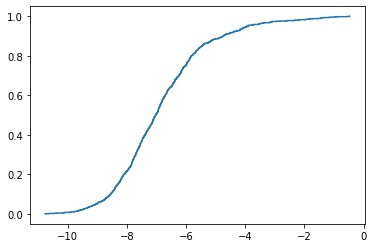

In [76]:
x,y=stairs(list(numpy.log(X_arr[:,5])))
f,ax = pyplot.subplots()
ax.plot(x,y)

In [81]:
binned_datasets[0].shape

(605, 8)

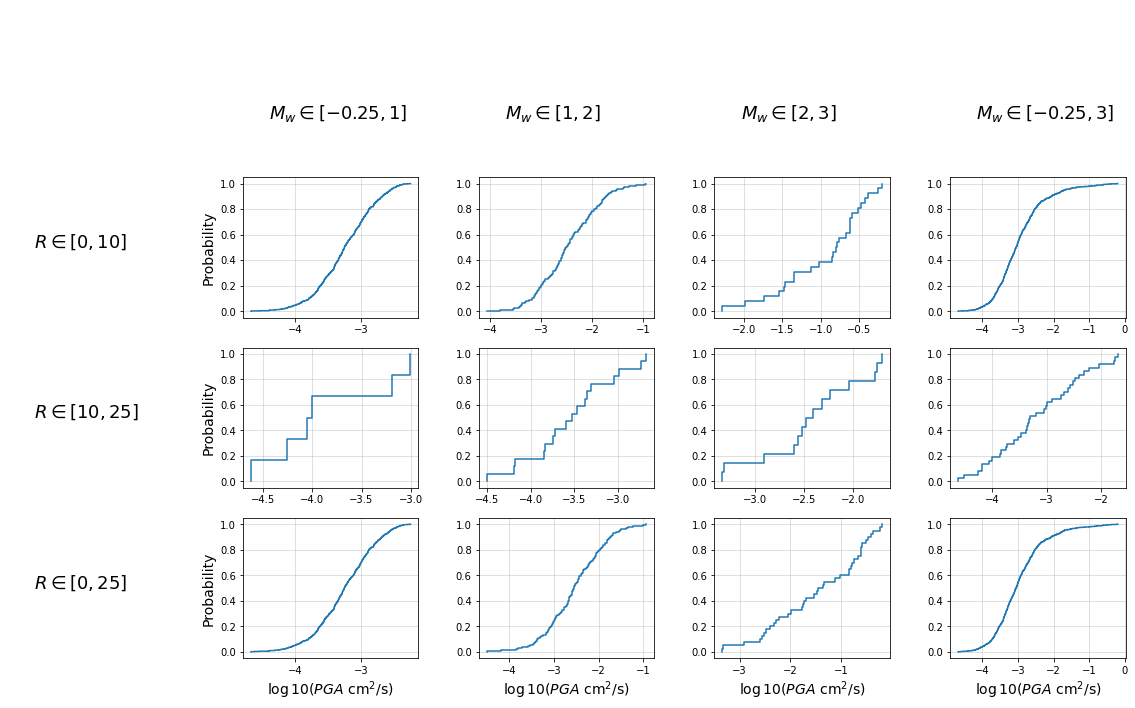

In [135]:
M_range = [r'$M_w \in [-0.25,1]$', r'$M_w \in [1,2]$', r'$M_w \in [2,3]$', r'$M_w \in [-0.25,3]$']
R_range = [r'$R \in [0,10]$', r'$R \in [10,25]$', r'$R \in [0,25]$']


fig,ax = pyplot.subplots(nrows=3+1,ncols=4+1,figsize=(16,10))
colors = numpy.linspace(0, 1, 10)

k=0
for i in range(4+1):
    for j in range(3+1):
        if i == 0:
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].axis('off')
            if j>0:
                ax[j,i].text(0.15,0.5,M_range[j-1],fontsize=18)
        elif j == 0:
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].axis('off')
            if i>0:
                ax[i,j].text(0.15,0.2,R_range[i-1],fontsize=18)
        else:
            if k<12:
                X_ij = binned_datasets[k]
                x,y = stairs(list(numpy.log10(X_ij[:,5])))
                ax[i,j].plot(x,y)
                ax[i,j].grid()
                ax[i,j].tick_params(grid_alpha=0.5)
        #         if i == 0:
        #             ax[i,j].set_xlabel(M_range[j],fontsize=20)
        #         if j == 0:
        #             ax[i,j].set_ylabel(R_range[i],fontsize=20)
                k+=1
        if i==1:
            ax[j,i].set_ylabel('Probability',fontsize=14)
        if j==3:
            ax[j,i].set_xlabel(r'$\log10 (PGA \ $cm$^2$/s)',fontsize=14)
        

# .xticks([0.5], [0.5])

pyplot.tight_layout(pad=1.3)


In [145]:
binned_datasets=[]
for mwrange in Mw_ranges:
    for rhrange in Rh_ranges:
        binned_datasets.append(binit(X_arr,mwrange,rhrange))

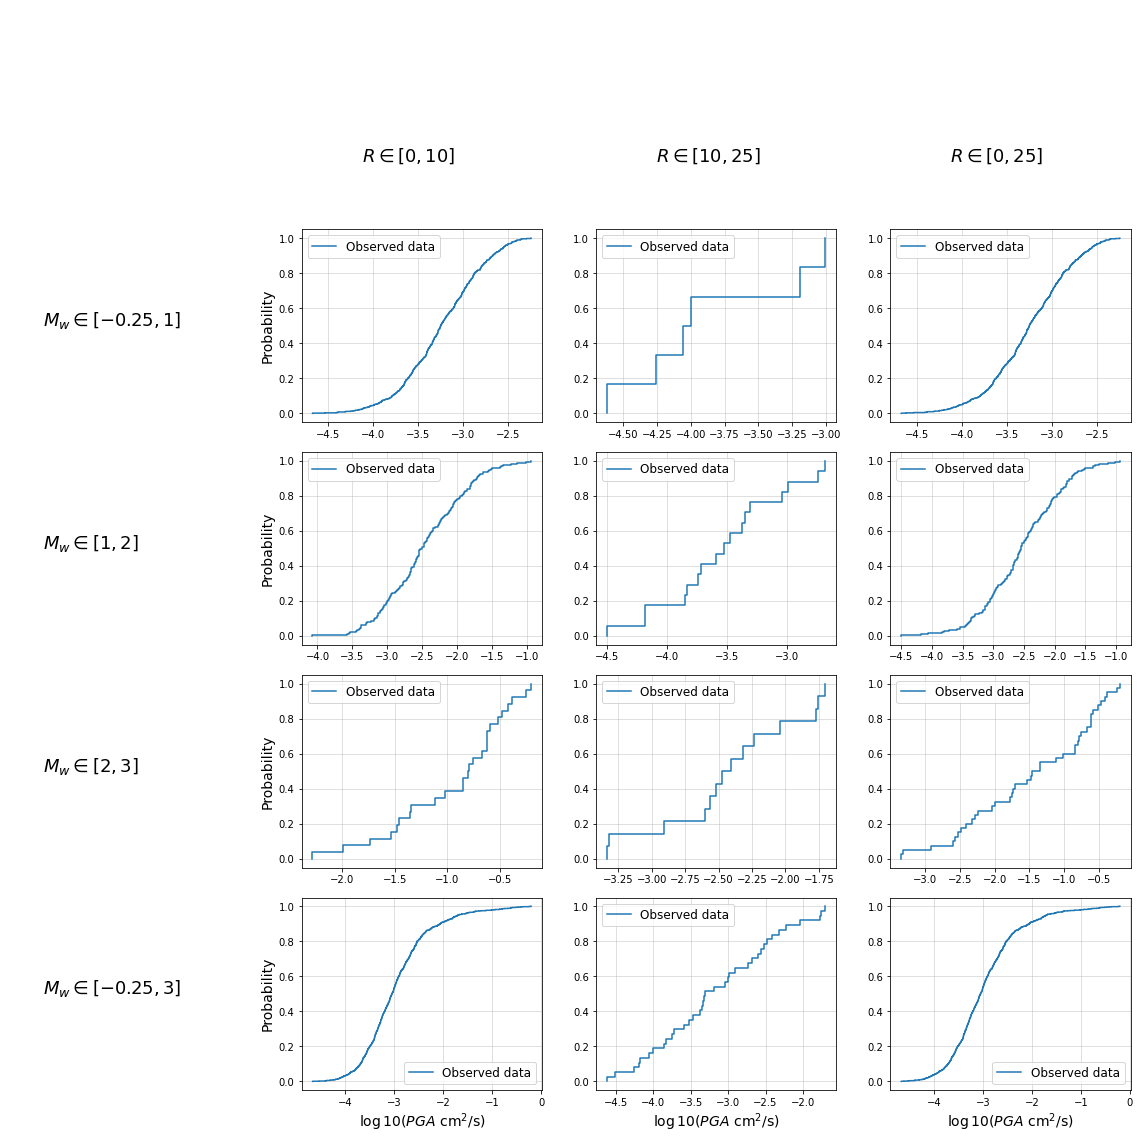

In [155]:
M_range = [r'$M_w \in [-0.25,1]$', r'$M_w \in [1,2]$', r'$M_w \in [2,3]$', r'$M_w \in [-0.25,3]$']
R_range = [r'$R \in [0,10]$', r'$R \in [10,25]$', r'$R \in [0,25]$']


fig,ax = pyplot.subplots(nrows=4+1,ncols=3+1,figsize=(16,16))
colors = numpy.linspace(0, 1, 10)

k=0
for i in range(4+1):
    for j in range(3+1):
        if i == 0:
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].axis('off')
            if j>0:
                ax[i,j].text(0.25,0.2,R_range[j-1],fontsize=18)
        elif j == 0:
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].axis('off')
            if i>0:
                ax[i,j].text(0.15,0.5,M_range[i-1],fontsize=18)
        else:
            if k<12:
                X_ij = binned_datasets[k]
                x,y = stairs(list(numpy.log10(X_ij[:,5])))
                ax[i,j].plot(x,y,label='Observed data')
                ax[i,j].grid()
                ax[i,j].tick_params(grid_alpha=0.5)
                ax[i,j].legend(fontsize=12)
        #         if i == 0:
        #             ax[i,j].set_xlabel(M_range[j],fontsize=20)
        #         if j == 0:
        #             ax[i,j].set_ylabel(R_range[i],fontsize=20)
                k+=1
        if i==4:
            ax[i,j].set_xlabel(r'$\log10 (PGA \ $cm$^2$/s)',fontsize=14)
        if j==1:
            ax[i,j].set_ylabel('Probability',fontsize=14)
            
        

# .xticks([0.5], [0.5])

pyplot.tight_layout(pad=1.3)
